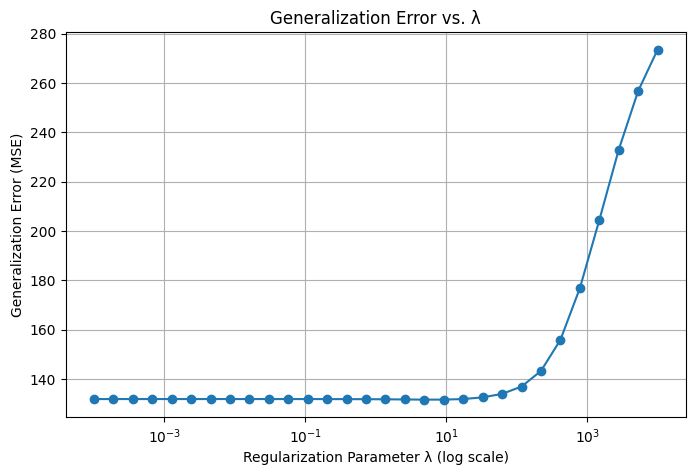

In [2]:
#Regression part a, 2


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = pd.read_excel(".\\datasets\\concrete\\Concrete_Data.xls")


# Split into features (X) and target (y)
X = df.iloc[:, :-1].values  # First 8 columns
y = df.iloc[:, -1].values   # Last column: compressive strength


# Standardize X using Z-score normalization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


# Define range of λ (alpha) values
lambdas = np.logspace(-4, 4, 30)


# Store mean generalization errors
mean_errors = []


# 10-fold cross-validation for each λ
for lam in lambdas:
    model = Ridge(alpha=lam)
    scores = -cross_val_score(model, X_std, y, cv=10, scoring='neg_mean_squared_error')
    mean_errors.append(np.mean(scores))


# Plot generalization error vs λ
plt.figure(figsize=(8, 5))
plt.plot(lambdas, mean_errors, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter λ (log scale)')
plt.ylabel('Generalization Error (MSE)')
plt.title('Generalization Error vs. λ')
plt.grid(True)
plt.show()


In [4]:
#Regression part b, 1

from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error


# --- Load data ---
concrete = fetch_ucirepo(id=165)
X = concrete.data.features
y = concrete.data.targets.values.ravel()  # flatten target


# --- CV settings ---
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
inner_cv = KFold(n_splits=10, shuffle=True, random_state=2)
rmse = make_scorer(mean_squared_error, squared=False)


# --- Baseline ---
baseline = DummyRegressor(strategy='mean')
baseline_scores = cross_val_score(baseline, X, y, cv=outer_cv, scoring=rmse)


# --- Ridge Regression ---
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
ridge_grid = {'ridge__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
ridge_search = GridSearchCV(ridge_pipeline, ridge_grid, cv=inner_cv, scoring=rmse)
ridge_scores = cross_val_score(ridge_search, X, y, cv=outer_cv, scoring=rmse)


# --- ANN ---
ann_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=2000, early_stopping=True, random_state=0))
])


ann_grid = {'mlp__hidden_layer_sizes': [(1,), (2,), (5,), (10,), (20,)]}
ann_search = GridSearchCV(ann_pipeline, ann_grid, cv=inner_cv, scoring=rmse)
ann_scores = cross_val_score(ann_search, X, y, cv=outer_cv, scoring=rmse)


# --- Results ---
results = pd.DataFrame({
    'Ridge RMSE': ridge_scores,
    'ANN RMSE': ann_scores,
    'Baseline RMSE': baseline_scores
})
print(results)
print("\nMean RMSEs:")
print(results.mean())

c:\Users\Adrian- Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Adrian- Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\Adrian- Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Adrian- Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

   Ridge RMSE  ANN RMSE  Baseline RMSE
0         NaN       NaN            NaN
1         NaN       NaN            NaN
2         NaN       NaN            NaN
3         NaN       NaN            NaN
4         NaN       NaN            NaN
5         NaN       NaN            NaN
6         NaN       NaN            NaN
7         NaN       NaN            NaN
8         NaN       NaN            NaN
9         NaN       NaN            NaN

Mean RMSEs:
Ridge RMSE      NaN
ANN RMSE        NaN
Baseline RMSE   NaN
dtype: float64


c:\Users\Adrian- Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Adrian- Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\Adrian- Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Adrian- Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi